# Field of View (FOV) and Resolution

The image we create is fundamentally defined by the field-of-view (FOV) and spatial resolution captured.  These are determined by our k-space sampling pattern.

## Learning Goals

1. Describe how images are formed
    * Describe what determines the image FOV and resolution
1. Manipulate MRI sequence parameters to improve performance
    * Manipulate the gradients and k-space sampling to change the FOV and resolution



## Field-of-View (FOV)

The FOV is determined by the sample spacing in k-space, with the simple relationship based on the sample spacing, $\Delta k$ as:

$$ FOV = \frac{1}{\Delta k}$$

For example, $FOV_{x} = \frac{1}{\Delta k_x}$

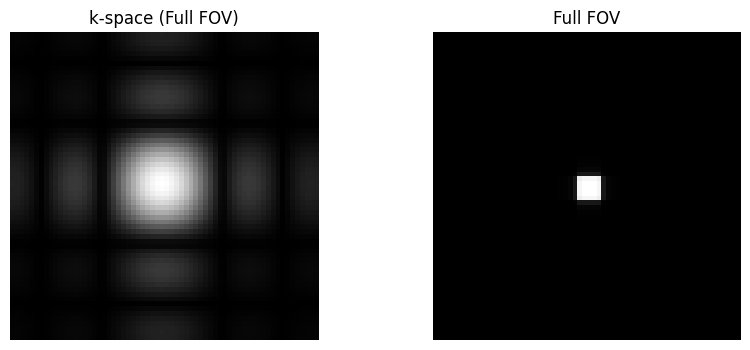

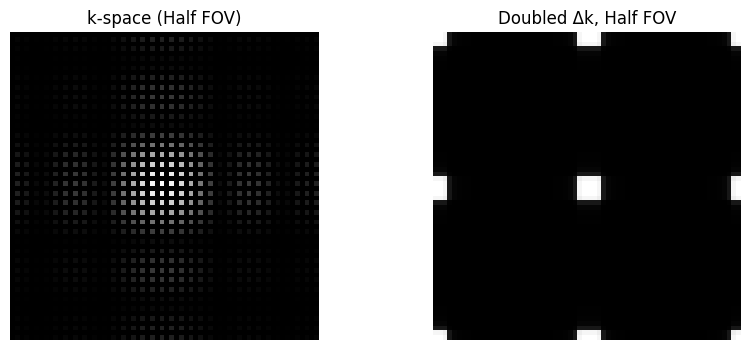

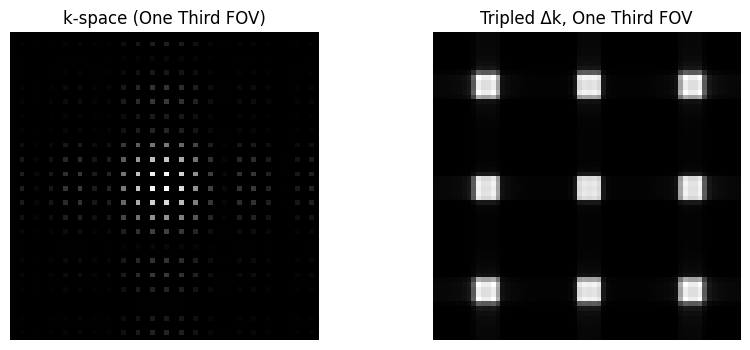

In [3]:
import numpy as np

import matplotlib.pyplot as plt

def sinc(x):
    return np.sinc(x / np.pi)

def ifft2c(x):
    # Centered inverse 2D FFT
    return np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(x)))

# rectangular object to demonstrate FOV

N = 64
kx = np.arange(-N/2+1, N/2+1) / N
N_rect = N // 4
kdata = np.outer(sinc(kx * N_rect), sinc(kx * N_rect))

rect_recon = ifft2c(kdata)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(kdata)+1e1), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('k-space (Full FOV)')
plt.subplot(1,2,2)
plt.imshow(np.abs(rect_recon), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('Full FOV')
plt.show()

kdata2 = kdata.copy()
kdata2[::2, :] = 0
kdata2[:, ::2] = 0
rect_recon2 = ifft2c(kdata2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(kdata2) + 1e1), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('k-space (Half FOV)')
plt.subplot(1,2,2)
plt.imshow(np.abs(rect_recon2), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('Doubled Δk, Half FOV')
plt.show()

kdata3 = kdata.copy()
kdata3[::3, :] = 0
kdata3[1::3, :] = 0
kdata3[:, ::3] = 0
kdata3[:, 1::3] = 0
rect_recon3 = ifft2c(kdata3)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(kdata3) + 1e1), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('k-space (One Third FOV)')
plt.subplot(1,2,2)
plt.imshow(np.abs(rect_recon3), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('Tripled Δk, One Third FOV')
plt.show()

## Spatial Resolution

The spatial resolution is determined by the maximum sample extent in k-space, with the simple relationship based on the maximum k-space sample locations, $k_{max}$ as:

$$ \delta = \frac{1}{2 k_{max}}$$

For example, $\delta_x = \frac{1}{2 k_{x,max}}$.

For symmetric sampling in k-space, this can also be defined based on the width of the k-space sampling, $W_k = 2 k_{max}$:

$$ \delta = \frac{1}{W_k}$$

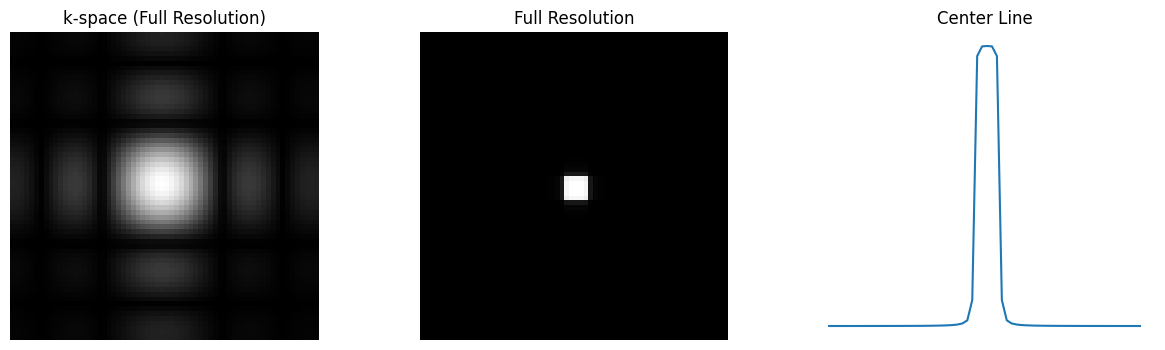

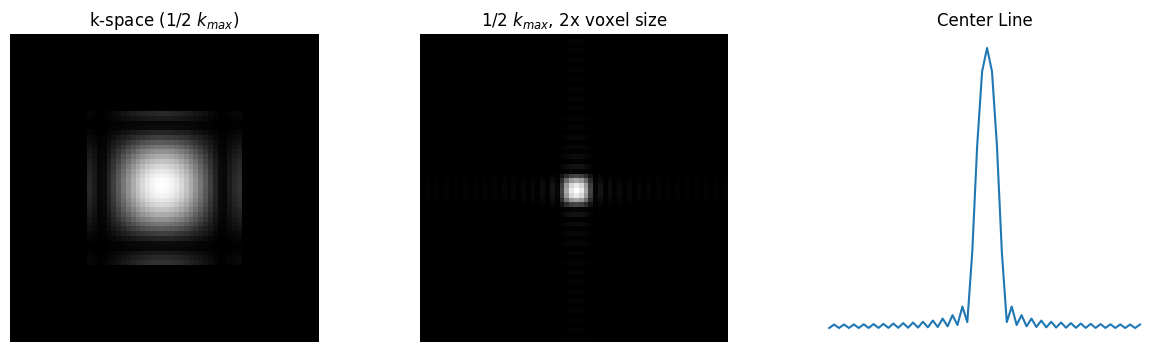

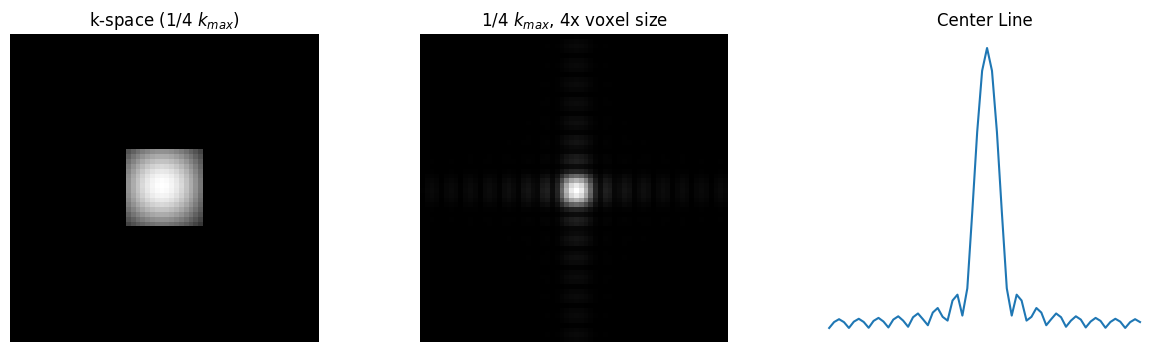

In [8]:
# rectangular object to demonstrate resolution

def plot_center_line(recon, fig_num, title):
    center = recon.shape[0] // 2
    plt.subplot(1, 3, 3)
    plt.plot(np.abs(recon[center, :]))
    plt.title(title)
    plt.axis('off')

# Full resolution (already defined as kdata and rect_recon)
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(kdata) + 1e1), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('k-space (Full Resolution)')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(rect_recon), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('Full Resolution')
plot_center_line(rect_recon, 1, 'Center Line')
plt.show()

# 1/2 k_max, 2x voxel size
kdata2 = kdata.copy()
kdata2[:int(1*N/4), :] = 0
kdata2[int(3*N/4):, :] = 0
kdata2[:, :int(1*N/4)] = 0
kdata2[:, int(3*N/4):] = 0
rect_recon2 = ifft2c(kdata2)

# 1/2 k_max, 2x voxel size
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(kdata2) + 1e1), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('k-space (1/2 $k_{max}$)')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(rect_recon2), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('1/2 $k_{max}$, 2x voxel size')
plot_center_line(rect_recon2, 2, 'Center Line')
plt.show()

# 1/4 k_max, 4x voxel size
kdata4 = kdata.copy()
N = kdata.shape[0]
kdata4[:int(3*N/8), :] = 0
kdata4[int(5*N/8):, :] = 0
kdata4[:, :int(3*N/8)] = 0
kdata4[:, int(5*N/8):] = 0
rect_recon4 = ifft2c(kdata4)


# 1/4 k_max, 4x voxel size
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(kdata4) + 1e1), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('k-space (1/4 $k_{max}$)')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(rect_recon4), cmap='gray', aspect='equal')
plt.axis('off')
plt.title('1/4 $k_{max}$, 4x voxel size')
plot_center_line(rect_recon4, 3, 'Center Line')
plt.show()